In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('skyserver.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
#dtypes: float64(10), int64(7), object(1)

In [7]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
#lets check the null values
df.isnull().sum()


objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
#so no null values
#df['class']=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

In [10]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [11]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

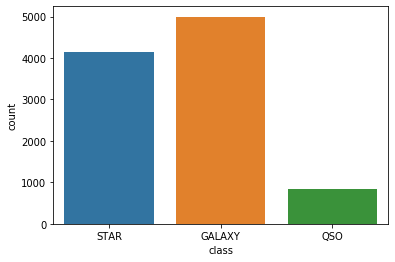

In [12]:
sns.countplot(x=df['class'])

In [13]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['class'])
df['class']=le.transform(df['class'])
#df


#i did it just to check on what correlation with Class
#to  focus visualisation on those correlated column

In [14]:
#star=2 galaxy =0 qso =1
df['class'].unique()

array([2, 0, 1])

In [15]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


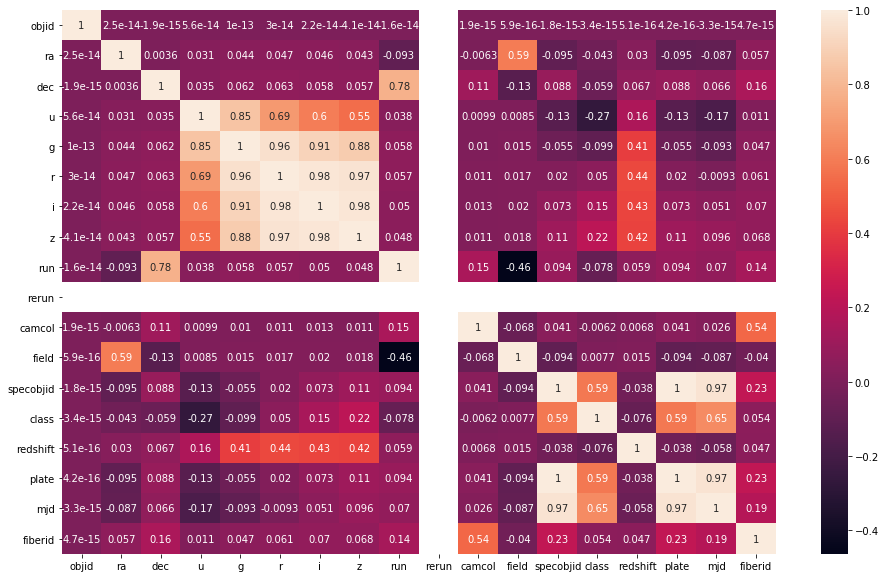

In [16]:

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [17]:
#sns.pairplot(df)

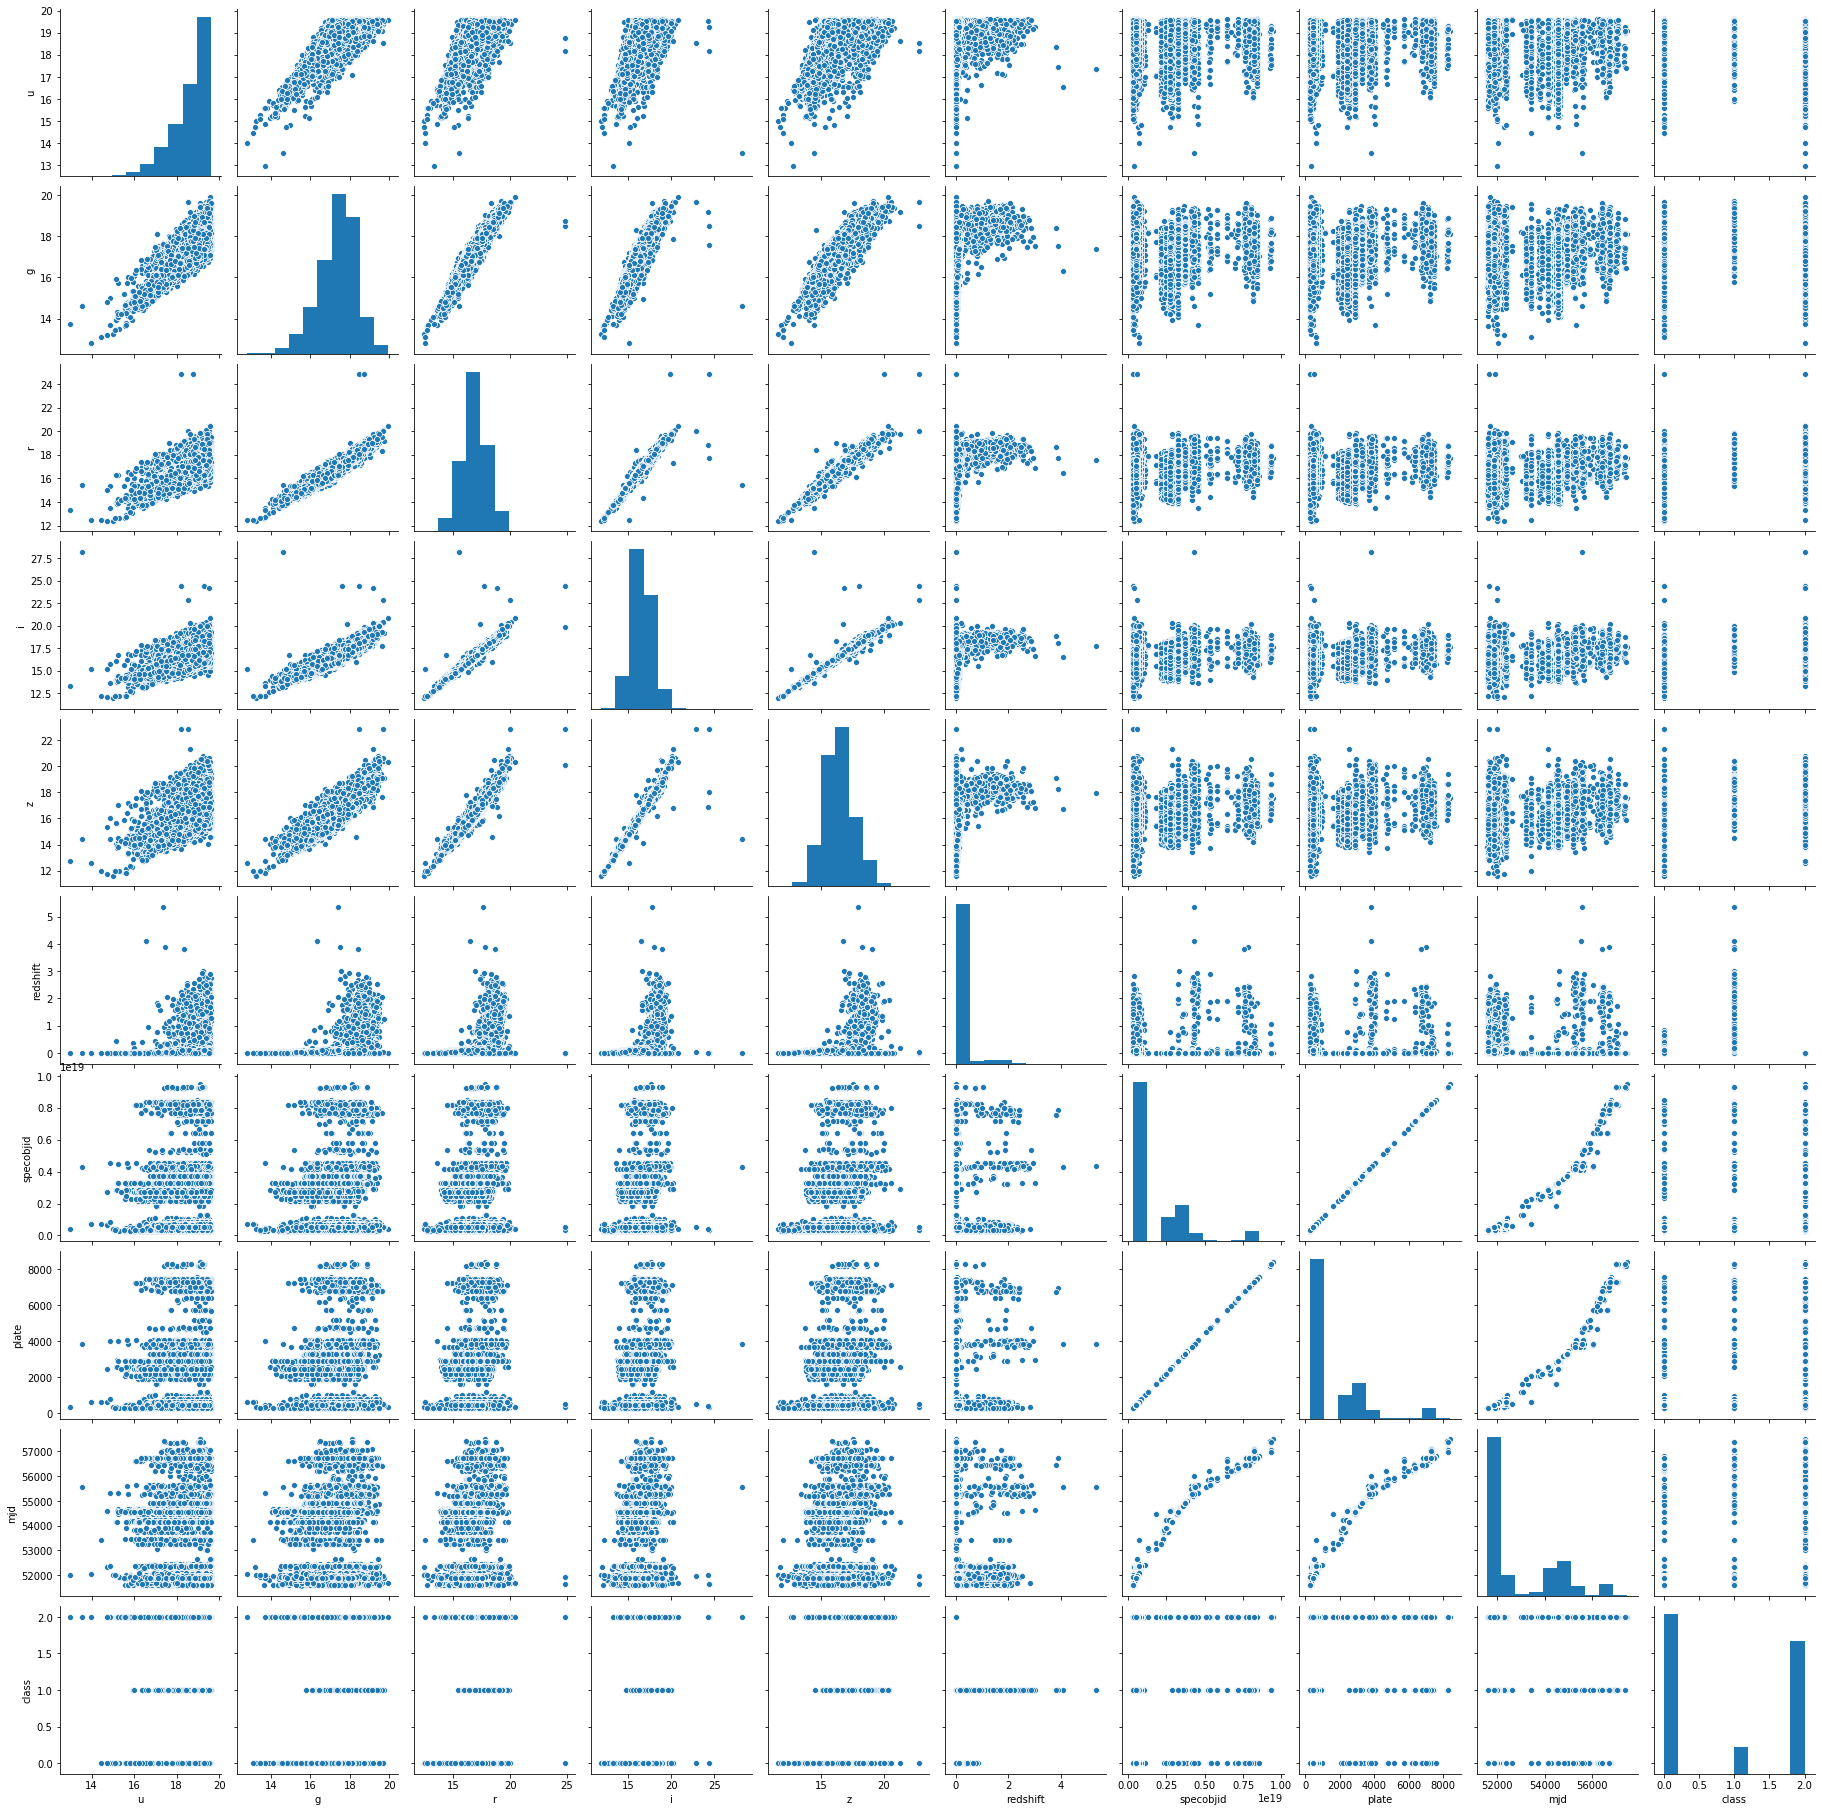

In [27]:
sns.pairplot(df[['u','g','r','i','z','redshift','specobjid','plate','mjd','class']])

In [19]:
#sns.swarmplot?

In [20]:
#sns.distplot?

In [23]:
sns.scatterplot?

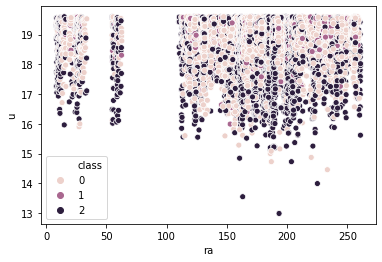

In [22]:
sns.scatterplot(x = 'ra',y='u', hue = 'class', data =df)

In [28]:
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [29]:
#Lets treat the skewness
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])
        

In [30]:
#drop useless column

In [31]:
#df.drop(columns=["objid"],inplace=True)  # cause id has has nothing to do with class

df.drop(columns=["rerun"],inplace=True)# cause theres only one value is present so this column is irrelevant

#df.drop(columns=["specobjid"],inplace=True)# cause id has nothing to do with target variable 'class'

#df.drop(columns=["fiberid"],inplace=True)# id has nothing to do with the target variable

In [32]:
x=df.drop(columns=["class"])

In [33]:
y=df['class']

In [34]:
x

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.073658e+06,5.682901,0.447630,2.690412,2.573418,15.94699,15.50342,15.22531,752,4,267,1.549790e+06,-0.020770,14.897073,38.011539,491
1,1.073658e+06,5.683593,0.513354,2.652522,2.582050,16.67637,16.48922,16.39150,752,4,267,7.138821e+05,-0.038006,6.861212,37.232767,541
2,1.073658e+06,5.684437,0.501575,2.686211,2.630012,17.47428,17.08732,16.80125,752,4,268,6.863152e+05,0.497469,6.596202,37.330614,513
3,1.073658e+06,5.686400,0.368184,2.609304,2.551094,16.16116,15.98233,15.90438,752,4,269,1.549791e+06,-0.048003,14.897073,38.011539,510
4,1.073658e+06,5.686531,0.468081,2.598730,2.533596,16.43869,16.55492,16.61326,752,4,269,1.549791e+06,0.083889,14.897073,38.011539,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.073658e+06,5.082839,3.721462,2.659843,2.594789,16.91508,16.68305,16.50570,1345,3,161,7.954665e+05,0.302144,7.646027,37.295659,246
9996,1.073658e+06,5.082706,3.724631,2.633903,2.593202,17.07692,16.71661,16.69897,1345,3,162,7.954639e+05,0.490171,7.646027,37.295659,228
9997,1.073658e+06,5.085884,3.724526,2.657033,2.609915,17.51872,17.43302,17.42048,1345,3,162,2.018382e+06,-0.073777,19.401431,38.487937,622
9998,1.073658e+06,5.084912,3.726594,2.662907,2.616399,17.53152,17.36284,17.13988,1345,3,163,7.954639e+05,0.241123,7.646027,37.295659,229


In [35]:
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
newx=sc.transform(x)
newx=pd.DataFrame(newx,columns=x.columns)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.20,random_state=42)

In [38]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.992
[[987   2   7]
 [  7 183   0]
 [  0   0 814]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.99      0.96      0.98       190
           2       0.99      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Accuracy score of SVC() is:
0.987
[[980   4  12]
 [  9 181   0]
 [  1   0 813]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       996
           1       0.98      0.95      0.97       190
           2       0.99      1.00      0.99       814

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



Accuracy score of DecisionTreeClassifier() is:
0.984
[[983 

In [39]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(RandomForestClassifier(),newx,y,cv=10,scoring="accuracy").mean())

0.9885000000000002


In [40]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),newx,y,cv=10,scoring="accuracy").mean())

0.9906000000000003


In [ ]:
#lets choose final model as logistic regression

In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(newx, y,random_state = 42,test_size=0.20,stratify=y)
lg=LogisticRegression()
lg.fit(x1_train,y1_train)
y1_pred=lg.predict(x1_test)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y1_test,y1_pred))
print("f1 score is : ",f1_score(y1_test,y1_pred,average='micro'))
print("classification report \n",classification_report(y1_test,y1_pred))
print("Accuracy score: ",accuracy_score(y1_test,y1_pred))

Confusion matrix 
 [[991   2   7]
 [ 10 160   0]
 [  0   0 830]]
f1 score is :  0.9905
classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.94      0.96       170
           2       0.99      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy score:  0.9905


In [44]:
import joblib
joblib.dump(lg,'spaceserver.obj')

['spaceserver.obj']